In [1]:
#Import Packages
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os
import re
import sys,traceback
from datetime import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10, 6



In [2]:
data = pd.read_csv(r'C:\Users\yaitali\Desktop\CA_Predictive\CA_FR.csv')

# parse string to datetime type
data['month']=pd.to_datetime(data['month'], infer_datetime_format=True)
indexedDataset=data.set_index(['month'])

In [3]:
from datetime import datetime 
indexedDataset.head(10)



,ca
month,
2020-01-01,20577063
2019-12-01,17748065
2019-11-01,21111577
2019-10-01,24140057
2019-09-01,20305801
2019-08-01,13168990
2019-07-01,21341716
2019-06-01,19967375
2019-05-01,18229721


C:\Users\yaitali\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


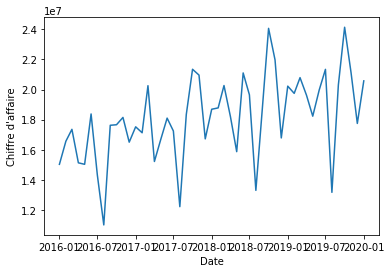

In [4]:
## plot graph
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaire")
plt.plot(indexedDataset)
plt.savefig('GraphCa.png'); 

In [5]:
## Determing rolling statistics

rolmean=indexedDataset.rolling(window=12).mean()

rolstd=indexedDataset.rolling(window=12).std()

print (rolmean, rolstd)


                      ca
month                   
2020-01-01           NaN
2019-12-01           NaN
2019-11-01           NaN
2019-10-01           NaN
2019-09-01           NaN
2019-08-01           NaN
2019-07-01           NaN
2019-06-01           NaN
2019-05-01           NaN
2019-04-01           NaN
2019-03-01           NaN
2019-02-01  1.972931e+07
2019-01-01  1.970010e+07
2018-12-01  1.961977e+07
2018-11-01  1.969135e+07
2018-10-01  1.968519e+07
2018-09-01  1.955364e+07
2018-08-01  1.956465e+07
2018-07-01  1.942381e+07
2018-06-01  1.951849e+07
2018-05-01  1.932204e+07
2018-04-01  1.920282e+07
2018-03-01  1.915903e+07
2018-02-01  1.907861e+07
2018-01-01  1.895066e+07
2017-12-01  1.894548e+07
2017-11-01  1.886135e+07
2017-10-01  1.863474e+07
2017-09-01  1.860263e+07
2017-08-01  1.851233e+07
2017-07-01  1.831188e+07
2017-06-01  1.806173e+07
2017-05-01  1.812757e+07
2017-04-01  1.787979e+07
2017-03-01  1.787895e+07
2017-02-01  1.774131e+07
2017-01-01  1.764393e+07
2016-12-01  1.762573e+07


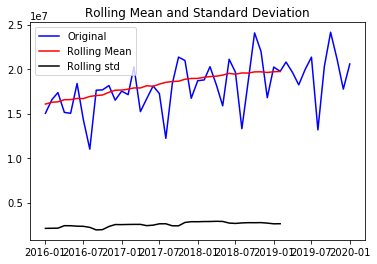

In [6]:
# plot rolling statistics:

orig=plt.plot(indexedDataset, color='blue' , label='Original')
mean=plt.plot(rolmean, color='red', label='Rolling Mean')
std=plt.plot(rolstd, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.savefig('image.png'); 


In [7]:
# perform dickey-fuller test:

from statsmodels.tsa.stattools import adfuller

print ('Results of dickey- fuller test:')

dftest=adfuller(indexedDataset['ca'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags Used', 'Number of Observations Used'])
for key, value in dftest [4].items():
    dfoutput['Critical Value (%s)'%key]=value

print(dfoutput)


Results of dickey- fuller test:
Test Statistic                  1.390900
p-value                         0.997072
#lags Used                     11.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


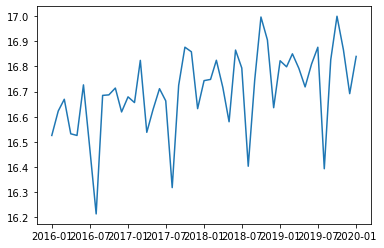

In [8]:
# Estimating trend

indexedDataset_logScale= np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

plt.savefig('EstimatingTrend.png'); 

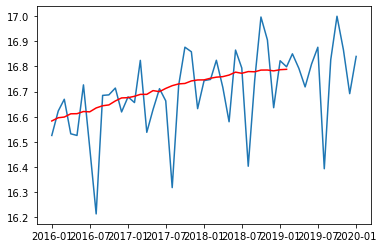

In [9]:
movingAverage =indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()

plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')
plt.savefig('movingAverage.png'); 

In [11]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(10)

#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)


,ca
month,
2019-02-01,0.010030
2019-01-01,0.035513
2018-12-01,-0.146397
2018-11-01,0.119549
2018-10-01,0.210909
2018-09-01,-0.033175
2018-08-01,-0.376138
2018-07-01,0.021047
2018-06-01,0.087721


In [12]:
from statsmodels.tsa.stattools import adfuller

#Determing rolling statistics
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['ca'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print (dfoutput)


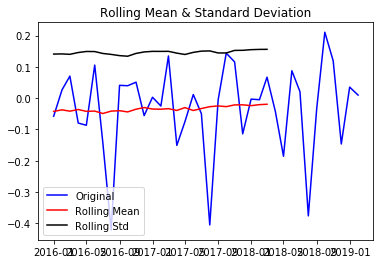

Results of Dickey-Fuller Test:
Test Statistic                 -4.032781
p-value                         0.001248
#Lags Used                     10.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


In [13]:
test_stationarity(datasetLogScaleMinusMovingAverage)

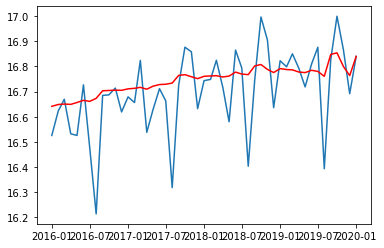

In [14]:
exponentialDecayWeightedAverage=indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

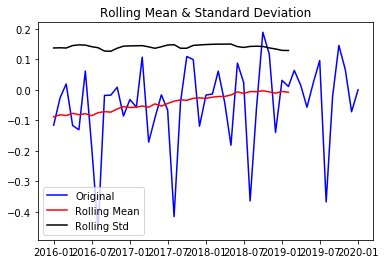

Results of Dickey-Fuller Test:
Test Statistic                  0.065501
p-value                         0.963625
#Lags Used                     11.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [15]:
datasetLogScalMinusMovingExponentialDecayAverage= indexedDataset_logScale - exponentialDecayWeightedAverage 
test_stationarity(datasetLogScalMinusMovingExponentialDecayAverage)

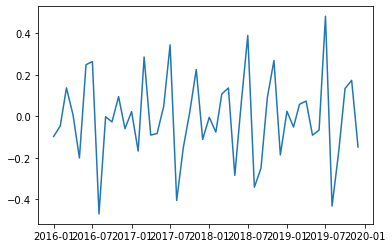

In [16]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

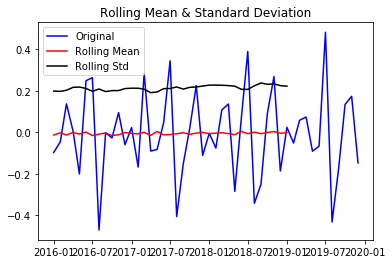

Results of Dickey-Fuller Test:
Test Statistic                -8.799327e+00
p-value                        2.133397e-14
#Lags Used                     1.000000e+01
Number of Observations Used    3.700000e+01
Critical Value (1%)           -3.620918e+00
Critical Value (5%)           -2.943539e+00
Critical Value (10%)          -2.610400e+00
dtype: float64


In [17]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

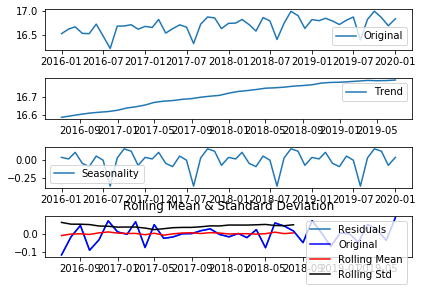

Results of Dickey-Fuller Test:
Test Statistic                 -4.828182
p-value                         0.000048
#Lags Used                      7.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDataset_logScale)

trend= decomposition.trend
seasonal= decomposition.seasonal
residual= decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label= 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label= 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label= 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label= 'Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)






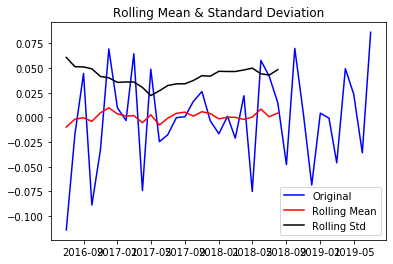

Results of Dickey-Fuller Test:
Test Statistic                 -4.828182
p-value                         0.000048
#Lags Used                      7.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


In [35]:
decomposedLogData = residual
decomposedLogData.dropna(inplace= True)
test_stationarity(decomposedLogData)

C:\Users\yaitali\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


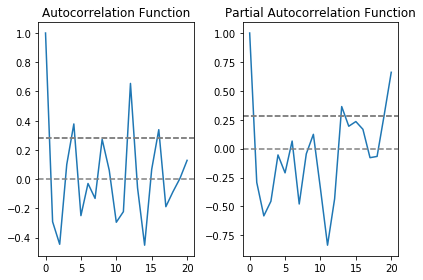

In [36]:
# ACF and PACF plots :
from statsmodels.tsa.stattools import acf , pacf 

lag_acf = acf(datasetLogDiffShifting, nlags= 20)
lag_pacf= pacf(datasetLogDiffShifting, nlags= 20 , method='ols')

#plot ACF:

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.title('Autocorrelation Function')


#plot PACF:

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_model import ARIMA

model_ARIMA1= ARIMA(indexedDataset_logScale, order=(2,1,2))
result1= model_ARIMA1.fit()
print(result1.aic)

plt.plot(data_log_value_shift, color='blue', alpha=0.5 )
plt.plot(result1.fittedvalues, color='red')

C:\Users\yaitali\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
C:\Users\yaitali\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)


Plotting AR model


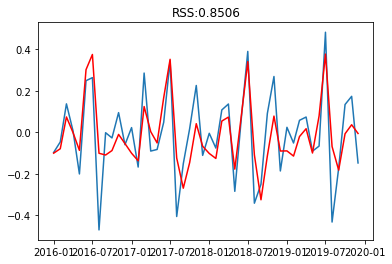

In [37]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model

model= ARIMA(indexedDataset_logScale, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum((results_AR.fittedvalues - datasetLogDiffShifting['ca'])**2))
print('Plotting AR model')

Plotting AR model


C:\Users\yaitali\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
C:\Users\yaitali\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)


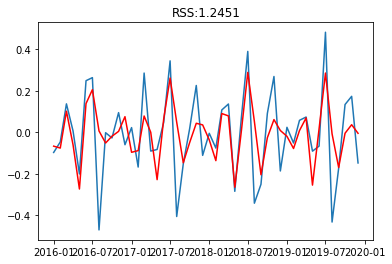

In [38]:
#MA Model

model= ARIMA(indexedDataset_logScale, order=(2,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum((results_MA.fittedvalues - datasetLogDiffShifting['ca'])**2))
print('Plotting AR model')

C:\Users\yaitali\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
C:\Users\yaitali\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS:0.850580')

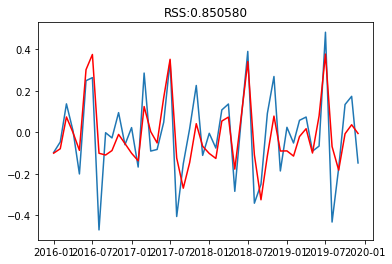

In [39]:
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA=model.fit(dispo=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS:%4f'% sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['ca'])**2))


In [40]:
prediction_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy= True)
print(prediction_ARIMA_diff.head())

month
2019-12-01   -0.005648
2019-11-01    0.036445
2019-10-01   -0.007105
2019-09-01   -0.182584
2019-08-01   -0.068687
dtype: float64


In [41]:
#convert to cumulative sum

prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

month
2019-12-01   -0.005648
2019-11-01    0.030797
2019-10-01    0.023692
2019-09-01   -0.158892
2019-08-01   -0.227579
dtype: float64


In [42]:
prediction_ARIMA_log = pd.Series(indexedDataset_logScale['ca'].ix[0], index=indexedDataset_logScale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum, fill_value=0)
prediction_ARIMA_log.head()

C:\Users\yaitali\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


month
2016-01-01    16.257619
2016-02-01    16.358285
2016-03-01    16.437577
2016-04-01    16.363549
2016-05-01    16.365080
dtype: float64

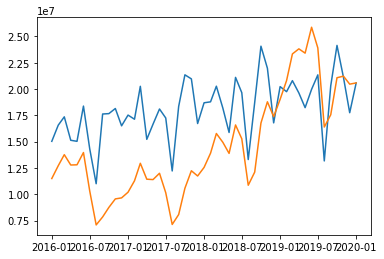

In [43]:
predictions_ARIMA= np.exp(prediction_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [44]:
indexedDataset_logScale

,ca
month,
2020-01-01,16.839688
2019-12-01,16.691787
2019-11-01,16.865332
2019-10-01,16.999383
2019-09-01,16.826417
2019-08-01,16.393375
2019-07-01,16.876174
2019-06-01,16.809610
2019-05-01,16.718564


In [45]:
#results_ARIMA.plot_predict(1,171)
results_ARIMA.forecast(steps=4)

(array([16.53914632, 16.57430964, 16.55824218, 16.53449544]),
 array([0.12585275, 0.12599296, 0.13825053, 0.13834418]),
 array([[16.29247946, 16.78581317],
        [16.32736797, 16.8212513 ],
        [16.28727612, 16.82920824],
        [16.26334583, 16.80564505]]))